In [1]:
from nltk import bigrams, word_tokenize
from nltk.util import ngrams

sentence = "I am a boy."
tokens = word_tokenize(sentence)

bigram = bigrams(tokens)
trigram = ngrams(tokens, 3)

print("\nbigram:")
for t in bigram:
    print(t)

print("\ntrigram:")
for t in trigram:
    print(t)


bigram:
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')

trigram:
('I', 'am', 'a')
('am', 'a', 'boy')
('a', 'boy', '.')


In [2]:
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
for t in bigram:
    print(t)

('SS', 'I')
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')
('.', 'SE')


In [6]:
from nltk import ConditionalFreqDist

sentence = "I am a boy."
tokens = word_tokenize(sentence) #단어 토큰화
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
#패딩 SS<문장>SE
cfd = ConditionalFreqDist([(t[0], t[1]) for t in bigram])
cfd.conditions()

['SS', 'I', 'am', 'a', 'boy', '.']

In [9]:
cfd['SS']

FreqDist({'I': 1})

In [11]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt') #텍스트를 문장으로 나눠주는 비지도 알고리즘
from nltk.corpus import movie_reviews #샘플 코퍼스 데이터 연결

sentences = []
for tokens in movie_reviews.sents(): #한 문장을 꺼내서
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    #토큰의 시작과 끝 추가 SS<문장>SE -> 토크을 앞+뒤 2개의 토큰을 하나의 토큰으로 묶는다.
    sentences += [t for t in bigram]

sentences[:20]


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\JSWonner\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JSWonner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


I


In [16]:
sentences[0:20]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE'),
 ('SS', 'they'),
 ('they', 'get'),
 ('get', 'into')]

In [18]:
print(type(sentences[0]))
sentences[0]
print(type(sentences))

<class 'tuple'>
<class 'list'>


In [19]:
cfd = ConditionalFreqDist(sentences)

In [25]:
cfd['SS'].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

In [21]:
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

In [22]:
cfd["."].most_common(5)

[('SE', 63404), ('"', 1854), (')', 535), ("'", 70), (']', 10)]

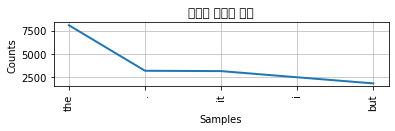

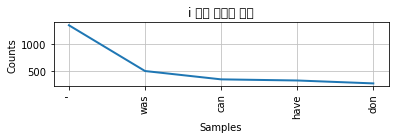

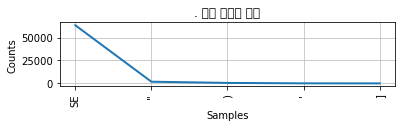

<AxesSubplot:title={'center':'. 다음 단어의 분포'}, xlabel='Samples', ylabel='Counts'>

In [26]:
import matplotlib.pyplot as plt
plt.subplot(311)
cfd["SS"].plot(5, title="문장의 첫단어 분포")
plt.subplot(312)
cfd["i"].plot(5, title="i 다음 단어의 분포")
plt.subplot(313)
cfd["."].plot(5, title=". 다음 단어의 분포")

In [28]:
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist) #빈도 추정 클래스

In [29]:
cpd["i"].prob("am")

0.018562267971650354

In [33]:
cpd["i"].prob("is")

<MLEProbDist based on 8889 samples>

In [34]:
#P(SS<문장>SE) = P(시작단어|SS)*P(|)*P(|)*P(|)*P(|)*P(SE|종료단어)

def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i + 1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p) #지수함수를 리턴

In [36]:
import numpy as np
test_sentence = ["i", "like", "the", "movie", "."] #단어 토큰화된 리스트
sentence_score(test_sentence)

2.740764134071561e-06

In [37]:
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

1.5015040140827832e-38

In [39]:
test_data=['the','movie','.']#실현 가능 문장
sentence_score(test_data)

0.003898785120601922

In [40]:
test_data2=['movie','.','the']#실현 불가능 문장
sentence_score(test_data2)

3.085769765203191e-17

In [41]:
import random
random.seed(10)
cpd['SS'].generate() #시작문자 아무거나 생성

'she'

In [42]:
cpd['she'].generate() #'she' 다음 문자 생성

'and'

In [43]:
cpd['and'].generate()

'fine'

In [56]:

print(cpd) #문맥을 조건으로 가지는 사전 자료형
print(cfd) #문맥을 조건으로 가지는 사전 자료형

<MLEProbDist based on 284 samples>
<ConditionalProbDist with 39769 conditions>
<ConditionalFreqDist with 39769 conditions>


In [46]:
def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []#새로 만들 sentence
    while True:
        if c not in cpd: #''현재문자'가 없다면 생성 불가
            break
        w = cpd[c].generate() #다음 문자 발생

        if w == "SE":
            break
        elif w in ["i", "ii", "iii"]:
            w2 = w.upper() #전처리
        elif w in ["mr", "luc", "i", "robin", "williams", "cindy", "crawford"]:
            w2 = w.title() #전처리
        else:
            w2 = w

        if c == "SS": 
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]: #특수문자 전처리
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]: #특수문자 전처리
            sentence.append(w2)
        else:
            sentence.append(" " + w2) #공백을 이용힌 단어 구분

        c = w #다음단어가 현재 단어가 된다.
    return "".join(sentence)

In [47]:
generate_sentence(6)

"Writers in one of the prison, yet, works as agent ray liotta, one of watching, we supposed to doubt that the holocaust - or the fact, the amc and don's wonderful experience, do what could either."

In [52]:
from nltk.util import ngrams#앞단어와 뒷단어 를 갖고있는 data생성용(바이그램으로 사용할 것)
from nltk import ConditionalFreqDist #문맥별 단어 빈도수 측정 클래스
from nltk.probability import ConditionalProbDist# 문맥별 조건부 확률 추정 클래스
from nltk.probability import MLEProbDist #최대 우도 추정값 클래스 
# .generate()샘플 추출 (임의의 값을 추출)

1. 데이터 수집

In [53]:
from nltk.corpus import movie_reviews #샘플 코퍼스
data=movie_reviews.sents()#단어별 토큰와 된 문장들

2. 데이터 전처리
-토큰화<br/>
-정형화<br/>
-정규화<br/>

In [54]:
data_l=[]#처리된 단어 토큰 조합
for 문장 in data:
    #토큰화된 리스트 양쪽 끝에 'SS'와 'SE' 를 츠기
    bg=ngrams(문장,2,pad_left=True,pad_right=True,left_pad_symbol="SS",right_pad_symbol="SE")
    data_l+=[t for t in bg]

3. 모델학습

In [55]:
cfd = ConditionalFreqDist(data_l) #문맥별 단어 빈도수 측정 클래스 (딕셔너리)
cpd = ConditionalProbDist(cfd,MLEProbDist) #문맥별 조건부확률 추정 클래스 (딕셔너리)

최종 동작 -(data별 추가적 처리가 필요)<자동 랜덤 문장 생성기>

In [57]:
st='SS'#문장의 시작
all_str=[]
import random
random.seed(10)#(seed고정으로 인한 data고정)
while True:#SS<문장>SE
    st=cpd[st].generate()#임의로 샘플 추출 ex) i->[am, a, data, SE]
    all_str.append(st)#리스트로 기록
    if st=='SE':#문장의 종료
        all_str.pop()
        break
생성된_data=''.join(all_str)#리스트의 내용을 이용하여 하나의 문자열로 정리


In [59]:
print(생성된_data)

sheandfineeffect;frankly,anddoinghissonbecomesshockinglylazyshortcuttohermotherof"story"
